In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt



In [ ]:
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target

In [ ]:
data['MedInc_HouseAge'] = data['MedInc'] * data['HouseAge']

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']])
poly_feature_names = poly.get_feature_names_out(['MedInc', 'HouseAge', 'AveRooms', 'AveOccup'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)


In [ ]:
data = pd.concat([data, poly_df], axis=1)


In [ ]:
features = housing.feature_names + ['MedInc_HouseAge'] + poly_feature_names.tolist()
X = data[features]
y = data['PRICE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.5187213542140167
Mean Squared Error: 0.5701649018319479
R-squared: 0.5648954553124778


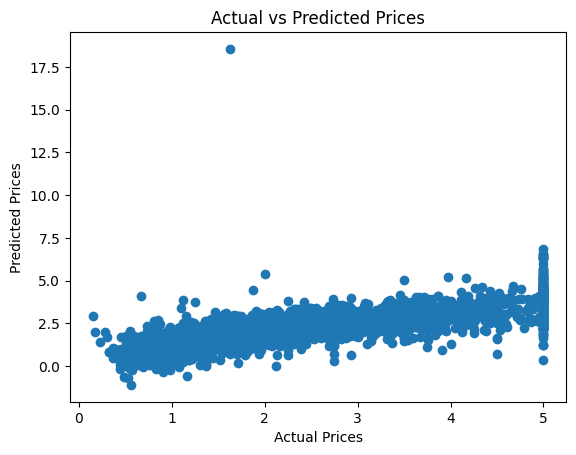

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()